In [2]:
import numpy as np
from IPython.display import Image


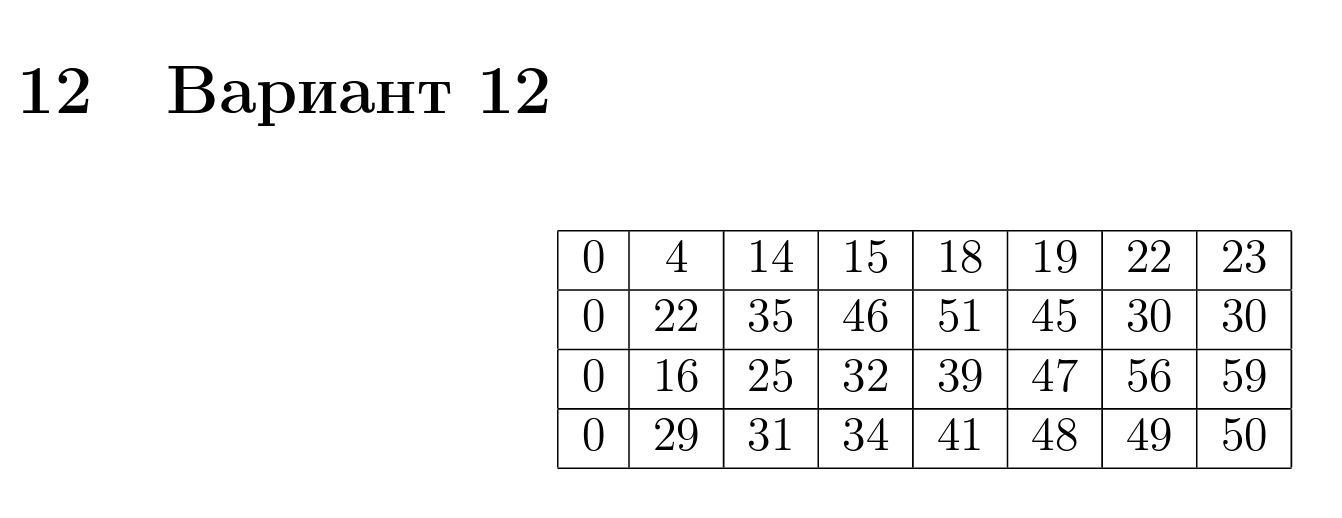

In [38]:
display(Image('image.png'))

In [7]:
def max_investment():

    print("Для того что бы взять данные из варианта введите любую цифру, для ввода своих введите 1")

    h = int(input())

    if h == 1:
        capital = int(input("Введите общий доступный капитал для инвестиций: "))

        capital //= 100

        num_of_companies = int(input("Введите количество компаний: "))

        profits = []

        max_length = 0

        for i in range(num_of_companies):
            profit_row = list(map(int, input(f"Введите прибыль для компании {i + 1} через пробел: ").split()))
            profits.append(profit_row)
            max_length = max(max_length, len(profit_row))

        for i in range(num_of_companies):
            while len(profits[i]) < max_length:
                profits[i].append(0)

        max_investment_per_company = list(
            map(int, input("Введите ограничения на максимальное вложение для каждой компании через пробел: ").split()))
    else:

        capital = 700

        capital //= 100

        num_of_companies = 4

        profits = [[0, 4, 14, 15, 18, 19, 22, 23], [0, 22, 35, 46, 51, 45, 30, 30], [0, 16, 25, 32, 39, 47, 56, 59],
                   [0, 29, 31, 34, 41, 48, 49, 50]]

        max_investment_per_company = [700, 200, 100, 700]

    """
        Рассчитывает стратегию максимальных инвестиций для максимизации прибыли в заданных ограничениях. Так же выводит оптимальное управление и итоговую прибыль

        Параметры:
        - num_of_companies (int): Количество компаний.
        - profits (список списков): Матрица, представляющая прибыль каждой компании при различных уровнях инвестиций.
        - capital (int): Общий доступный капитал для инвестиций.
        - max_investment_per_company (список): Максимально разрешенные инвестиции для каждой компании.

        Возвращает:
        Ничего
        """
    # Матрица для занчений Fi
    fmax = np.zeros((num_of_companies+1, capital+1), dtype=int)
    # Матрица для условно-оптимальных управлений
    choices = np.zeros((num_of_companies, capital+1), dtype=int)


    for i in range(num_of_companies-1, -1, -1):

        if i == 0:
            k_max = min(7, max_investment_per_company[i] // 100)
            for k in range(k_max+1):
                if fmax[i+1, 7-k] + profits[i][k] >= fmax[i, 7]:
                    fmax[i, 7] = fmax[i+1, 7-k] + profits[i][k]
                    choices[i, 7] = k

        else:
            for j in range(capital+1):
                k_max = min(j, max_investment_per_company[i] // 100)
                for k in range(k_max+1):
                    if fmax[i+1, j-k] + profits[i][k] >= fmax[i, j]:
                        fmax[i, j] = fmax[i+1, j-k] + profits[i][k]
                        choices[i, j] = k


    investments = []
    i = 0
    j = capital
    while i < num_of_companies:
        investments.append(choices[i, j])
        j -= choices[i, j]
        i += 1




    print("Оптимальные вложения в каждую компанию (в порядке от первой до последней):")
    total_profit = 0
    for i, investment in enumerate(investments):
        amount_invested = investment * 100
        total_profit += profits[i][investment]

        print(f"It should be spent {amount_invested} on company {i+1} ")

    print(f"Total profit is {total_profit}")
    print(fmax)
    print(choices)
    print(investments)


In [8]:
max_investment()


Для того что бы взять данные из варианта введите любую цифру, для ввода своих введите 1
Оптимальные вложения в каждую компанию (в порядке от первой до последней):
It should be spent 200 on company 1 
It should be spent 200 on company 2 
It should be spent 100 on company 3 
It should be spent 200 on company 4 
Total profit is 96
[[ 0  0  0  0  0  0  0 96]
 [ 0 29 51 67 80 82 85 92]
 [ 0 29 45 47 50 57 64 65]
 [ 0 29 31 34 41 48 49 50]
 [ 0  0  0  0  0  0  0  0]]
[[0 0 0 0 0 0 0 2]
 [0 0 1 1 2 2 2 2]
 [0 0 1 1 1 1 1 1]
 [0 1 2 3 4 5 6 7]]
[2, 2, 1, 2]
